ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **14Oct20**

# Laboratory Work 07 (15Oct20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Andrew Raneri`

### Rubric for each assignment: 

|        Context            |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (20pts)](#a1) Solution of $\overset{(100 \times 100)}{\Amtrx}\,\xvec = \bvec$.
 - [1.1)](#a11) Import image as matrix.
 - [1.2)](#a12) Compute solution and explain.
* [Assignment 2 (25pts)](#a2) Matrix inverse.
 - [2.1)](#a21) Compute inverse.
 - [2.2)](#a22) Demonstrate correctness.
 - [2.3)](#a23) Plot $\Amtrx$, $\Amtrx^{-1}$ and $\Amtrx^{-1}\Amtrx$.
* [Assignment 3 (25pts)](#a3) 
 - [3.1)](#a31) Solution of $\overset{(100 \times 50)}{\Amtrx}\,\xvec = \bvec$.
 - [3.2)](#a32) Solution of $\overset{(50 \times 100)}{\Amtrx}\,\xvec = \bvec$.
* [Assignment 4 (25pts)](#a4) Stoichiometry
 - [4.1)](#a41) Compute rank(S).
 - [4.2)](#a42) Compute given matrix equation.
* [Assignment 5 (5pts)](#a5) 

 ---

## <span style="color:blue">[Assignment 1 (20 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa) Import the following image URL: 
        
 + https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png
</span>
<br>

### <span style="color:blue">as a matrix $\Amtrx$ (need internet connection) and plot.</span><a id="a11"></a>

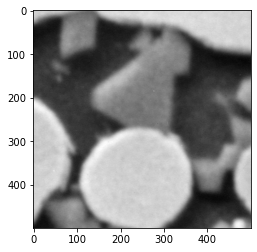

(100, 100)


In [1]:
'''1.1) Import matrix and show image'''
from matplotlib import pyplot as plt
cermet = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png',format='png')
cermet = cermet.astype('float64')
plt.imshow( cermet, cmap='gray' )
plt.show()
A = cermet[:100,:100]
print(A.shape)

### <span style="color:blue">[1.2)](#toa) Compute the solution
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(100 \times 100)}{\Amtrx}\,\xvec = \bvec, 
\end{equation*}
</span>
    
### <span style="color:blue">where $\bvec$ is a random vector. Use your algorithms. Explain why there is a solution if $\bvec$ is random. Verify that your solution method is correct; explain.</span><a id="a12"></a>

In [2]:
'''1.2) Code for A x = b'''
import numpy as np


def pqlu_factorization(A, pivot_option=None ):
   
                  
    m = A.shape[0]
    n = A.shape[1]
    
    Lq = np.eye(m,m)    
    Uq = np.copy(A)
    Pq = np.eye(m)
    Q = np.eye(n)
    
    
    for k in range(n-1):
        max_mag = np.max(np.abs(Uq[k:,k:]))
        pivot_cand = np.abs(np.copy(Uq))
        pivot_cand[:k,:] = 0
        pivot_cand[:,:k] = 0
        (row_ids,col_ids) = np.where(pivot_cand == max_mag)
        pivot_row_id = max(k,row_ids[0])
        pivot_col_id = max(k,col_ids[0])
        pivot = Uq[pivot_row_id,pivot_col_id]
        
        P_k = np.eye(m)
        save = np.copy(P_k[k,:])
        P_k[k,:] = P_k[pivot_row_id, :]
        P_k[pivot_row_id, :] = save
        Pq = P_k @ Pq
        Uq = P_k @ Uq
        
        q_k = np.eye(n)
        save = np.copy(q_k[:,k])
        q_k[:,k] = q_k[:,pivot_col_id]
        q_k[:, pivot_col_id] = save
        
        Q = Q @ q_k
        Uq = Uq @ q_k
        
        for i in range (k+1,m):
            multiplier = Uq[i,k]/pivot
            Lq[i,k] = multiplier
            for j in range (k,n):
                Uq[i,j] -= Uq[k,j] * multiplier
        Lq[:,:k] = P_k @ Lq[:,:k]
    return (Pq,Q,Lq,Uq)

(Pq,Q,Lq,Uq,) = pqlu_factorization(A)
print('P =\n',Pq)
print('Q =\n',Q)
print('L =\n',Lq)
print('U =\n',Uq)
print('')
print('Checking...')
print('LU - PAQ =\n', np.max(np.abs(Lq @ Uq - Pq @ A @ Q)))



P =
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Q =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
L =
 [[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.14572864  1.          0.         ...  0.          0.
   0.        ]
 [ 0.46733669  0.29445854  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.16080403  0.84622441 -0.00704522 ...  1.          0.
   0.        ]
 [ 0.21105528  0.84255515 -0.06326742 ...  0.95816131  1.
   0.        ]
 [ 0.72361811 -0.11257979  0.6387284  ...  0.73211694  0.11268107
   1.        ]]
U =
 [[ 0.78039217  0.65882355  0.73333335 ...  0.73725492  0.72549021
   0.71764708]
 [ 0.          0.47261802  0.00685782 ...  0.10432555  0.04721648
   0.31894768]
 [ 0.          0.          0.30624749 ... -0.19879523 

In [3]:
b_vec = np.random.random(A.shape[0])

def fsolve(Lq, b_vec, loop_option='use-dot-product'):

    m = Lq.shape[0]
    n = Lq.shape[1]
    y_vec = np.zeros(n)
    
    for i in range(m):
        sum_lower = np.dot(Lq[i, :i], y_vec[:i])
        y_vec[i] = (b_vec[i] - sum_lower) / Lq[i, i]
    return y_vec


def bsolve(Uq, b_vec, loop_option='use-dot-product'):

    m = Uq.shape[0]
    n = m
    z_vec = np.zeros(n)
    
    for i in reversed(range(n)):
        sum_upper = np.dot(Uq[i, i+1:], z_vec[i+1:])
        z_vec[i] = (b_vec[i] - sum_upper) / Uq[i, i]
    return z_vec

def xsolve(A, b_vec):
    (Pq,Q,Lq,Uq,) = pqlu_factorization(A)
    y_vec = fsolve(Lq, Pq @ b_vec)
    z_vec = bsolve(Uq, y_vec)
    x_vec = (Q @ z_vec)
    return x_vec

x_vec = xsolve(A, b_vec)
print('x =',x_vec)

x = [  42.84374455  -29.82860891   23.19178832  -44.45451783   60.51078137
  -96.55061852   58.48511791   21.91492537    4.42422796   -3.01006887
  -33.74127167   12.22043639   -3.3692555    64.02322438   48.70297012
 -101.5439319   -38.44747894   70.32268016    8.07915265  -71.06242479
  -26.95045763   94.25870856 -101.63330378   58.31816129  -69.09688772
   48.33045721  -48.17696752   78.92252501  -59.21212701   27.8232825
   -8.24850857  -20.01090976  -24.05781821  -22.91399111   25.39559522
  -37.29802793   74.7610927  -145.08822862  132.26724785  -27.17063926
   46.93686412 -105.62766674  -29.00908573   92.49822461  -44.5501242
  134.55376009  -20.69212596   -4.02165731  -43.88163762  -23.46921705
  138.32694926 -155.52110644   32.1749901    50.05802105   33.73878424
  -31.26038818  -78.34271001   82.11337238   10.48722748  -59.97364615
  127.84690454 -147.3092327    46.06641961   30.93302735  -67.36037516
   77.03875235   50.03797721 -243.9153136   285.13751067 -158.2815612
  166

In [4]:
'''1.2) Code for A x = b correctness'''
x_vec_check = np.linalg.solve( A, b_vec )
print('x check =',x_vec_check)
check = b_vec - A @ x_vec

print('||b - A x|| =',np.linalg.norm( check ))

x check = [  42.84374455  -29.82860891   23.19178832  -44.45451783   60.51078137
  -96.55061852   58.48511791   21.91492537    4.42422796   -3.01006887
  -33.74127167   12.22043639   -3.3692555    64.02322438   48.70297012
 -101.5439319   -38.44747894   70.32268016    8.07915265  -71.06242479
  -26.95045763   94.25870856 -101.63330378   58.31816129  -69.09688772
   48.33045721  -48.17696752   78.92252501  -59.21212701   27.8232825
   -8.24850857  -20.01090976  -24.05781821  -22.91399111   25.39559522
  -37.29802793   74.7610927  -145.08822862  132.26724785  -27.17063926
   46.93686412 -105.62766674  -29.00908573   92.49822461  -44.5501242
  134.55376009  -20.69212596   -4.02165731  -43.88163762  -23.46921705
  138.32694926 -155.52110644   32.1749901    50.05802105   33.73878424
  -31.26038818  -78.34271001   82.11337238   10.48722748  -59.97364615
  127.84690454 -147.3092327    46.06641961   30.93302735  -67.36037516
   77.03875235   50.03797721 -243.9153136   285.13751067 -158.2815612

**Explanation:**
First after using the first 100 values of the rows and columns of the array cermet I created a complete pivoting code and then checked it by finding the max abs value of the array to show that its very small value is close enough to zero so that its correct. I then used my forward solve and backward solve to get the lower and upper matrix vector values. I then created my x solver to use my forward and backward solve answers to get my x vector. Then my xsolve could be used identically to np.linalg.solve. I checked it twice once with np.linalg.solve and once with find the max abs value of b - Ax and found that it was close to zero so it is correct.

## <span style="color:blue">[Assignment 2 (25 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa) Using your algorithms, compute the matrix: 
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(50 \times 50)}{\Amtrx^{-1}}
\end{equation*}
</span><a id="a21"></a>

In [5]:
'''2.1) Code to invert A'''
A_50 = cermet[:50,:50]

def inverse(A_50):
    m = A_50.shape[0]
    A_50_inv = np.zeros(A_50.shape)
    I = np.eye(m)
    
    for i in range (0,m):
        A_50_inv[:, i] = xsolve(A_50, I[:,i])
        
    return A_50_inv

A_50_inv = inverse(A_50)
print('A^-1 =', A_50_inv)

A^-1 = [[  35.82330895  144.26013042 -261.3745991  ...   70.48819808
   325.67563044  352.48379315]
 [ -30.94168915 -114.86933971  211.03539279 ...  -72.22150209
  -301.45296201 -300.43967736]
 [ -11.28476688 -120.10235379  196.71362617 ...  -32.74355054
  -211.45864326 -265.65754347]
 ...
 [   0.73056618  -11.90337512   21.06625749 ...   27.88368776
   -18.42887859  -67.12452606]
 [ -21.21772655  -98.39763252  158.23877652 ...  -72.03175308
  -187.65104928 -178.28374602]
 [   2.66834079    8.7915892    -4.84883185 ...   19.38652116
    -6.26923965  -15.71999585]]


### <span style="color:blue">[2.2)](#toa) Demonstrate your computed $\overset{(50 \times 50)}{\Amtrx^{-1}}$ is correct and explain.</span><a id="a22"></a>

In [6]:
'''2.3) Code for correctness'''
A_50_inv_check = np.linalg.inv( A_50 ) 

print('A^-1 =\n', A_50_inv_check)


A^-1 =
 [[  35.82330895  144.26013042 -261.3745991  ...   70.48819808
   325.67563044  352.48379315]
 [ -30.94168915 -114.86933971  211.03539279 ...  -72.22150209
  -301.45296201 -300.43967736]
 [ -11.28476688 -120.10235379  196.71362617 ...  -32.74355054
  -211.45864326 -265.65754347]
 ...
 [   0.73056618  -11.90337512   21.06625749 ...   27.88368776
   -18.42887859  -67.12452606]
 [ -21.21772655  -98.39763252  158.23877652 ...  -72.03175308
  -187.65104928 -178.28374602]
 [   2.66834079    8.7915892    -4.84883185 ...   19.38652116
    -6.26923965  -15.71999585]]


**Explanation:**

### <span style="color:blue">[2.3)](#toa) Make a plot of $\overset{(50 \times 50)}{\Amtrx}$, $\overset{(50 \times 50)}{\Amtrx^{-1}}$, and the product $\overset{(50 \times 50)}{\Amtrx^{-1}}\,  \overset{(50 \times 50)}{\Amtrx}$. Explain the plots; in particular the rightmost one.</span><a id="a23"></a>

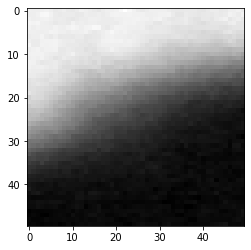

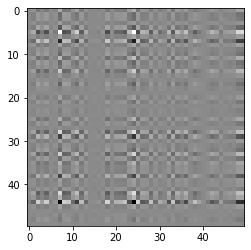

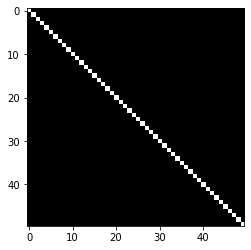

In [7]:
'''2.3) Code for plotting'''
I_plot = A_50_inv @ A_50

from matplotlib import pyplot as plt
plt.imshow( A_50, cmap='gray' )
plt.show()
plt.imshow( A_50_inv, cmap='gray' )
plt.show()
plt.imshow( I_plot, cmap='gray' )
plt.show()

**Explanation:**
The reason for this white line at the diagonal is where the upper matrix and lower matrix meet. This is where all of the pivot points are located giving a zero value back so the spot just shows up as white the outside is black because the upper and lower matrix are each covering their part that would show picture so their black halves are the only thing showing.

## <span style="color:blue">[Assignment 3 (25 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">[3.1)](#toa) Using your algorithms, what can you say about the solution of: 
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(100 \times 50)}{\Amtrx}\,\xvec = \bvec.
\end{equation*}
</span>
    
### <span style="color:blue">Explain.</span><a id="a31"></a>

In [8]:
'''3.1) Code for A x = b'''
A_long = cermet[:100,:50]
b_vec_long = np.random.random(A_long.shape[0])

import numpy as np


def pqlu_factorization_long(A_long, pivot_option=None ):
   
                  
    m = A_long.shape[0]
    n = A_long.shape[1]
    
    Lq = np.eye(m,m)    
    Uq = np.copy(A_long)
    Pq = np.eye(m)
    Q = np.eye(n)
    
    
    for k in range(min(m,n)):
        max_mag = np.max(np.abs(Uq[k:,k:]))
        pivot_cand = np.abs(np.copy(Uq))
        pivot_cand[:k,:] = 0
        pivot_cand[:,:k] = 0
        (row_ids,col_ids) = np.where(pivot_cand == max_mag)
        pivot_row_id = max(k,row_ids[0])
        pivot_col_id = max(k,col_ids[0])
        pivot = Uq[pivot_row_id,pivot_col_id]
        
        P_k = np.eye(m)
        save = np.copy(P_k[k,:])
        P_k[k,:] = P_k[pivot_row_id, :]
        P_k[pivot_row_id, :] = save
        Pq = P_k @ Pq
        Uq = P_k @ Uq
        
        q_k = np.eye(n)
        save = np.copy(q_k[:,k])
        q_k[:,k] = q_k[:,pivot_col_id]
        q_k[:, pivot_col_id] = save
        
        Q = Q @ q_k
        Uq = Uq @ q_k
        
        for i in range (k+1,m):
            multiplier = Uq[i,k]/pivot
            Lq[i,k] = multiplier
            for j in range (k,n):
                Uq[i,j] -= Uq[k,j] * multiplier
        Lq[:,:k] = P_k @ Lq[:,:k]
    
    return (Pq,Q,Lq,Uq)






In [9]:
(Pq,Q,Lq,Uq) = pqlu_factorization_long(A_long)
print('P =\n',Pq)
print('Q =\n',Q)
print('L =\n',Lq)
print('U =\n',Uq)
print('')
print('Checking...')
print('Max Abs', np.max(np.abs(Lq @ Uq - Pq @ A_long @ Q)))

P =
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Q =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
L =
 [[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.46733669  1.          0.         ...  0.          0.
   0.        ]
 [ 0.79899499  0.47816911  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.23618091  0.15054656 -0.64790999 ...  1.          0.
   0.        ]
 [ 0.16080403  0.01182635 -0.08864927 ...  0.          1.
   0.        ]
 [ 0.25628141  0.0900083  -0.57612995 ...  0.          0.
   1.        ]]
U =
 [[ 7.80392170e-01  7.33333349e-01  7.33333349e-01 ...  7.41176486e-01
   7.25490212e-01  7.17647076e-01]
 [ 0.00000000e+00  3.08266836e-01 -1.38792006e-01 ...  2.77150472e-01
  -2.14011219e-02 -8.83239823e-02]
 [ 0.00000000e

In [10]:
def fsolve_long(Lq, b_vec_long, loop_option='use-dot-product'):

    m = Lq.shape[0]
    n = Lq.shape[1]
    y_vec_long = np.zeros(m)
    
    for i in range(m):
        sum_lower = np.dot(Lq[i, :i], y_vec_long[:i])
        y_vec_long[i] = (b_vec_long[i] - sum_lower) / Lq[i, i]
    return y_vec_long


def bsolve_long(Uq, b_vec_long, loop_option='use-dot-product'):

    m = Uq.shape[0]
    n = Uq.shape[1]
    z_vec_long = np.zeros(n)
    
    for i in reversed(range(n)):
        sum_upper = np.dot(Uq[i, i+1:], z_vec_long[i+1:])
        z_vec_long[i] = (b_vec_long[i] - sum_upper) / Uq[i, i]
    return z_vec_long

def xsolve_long(A_long, b_vec_long):
    (Pq,Q,Lq,Uq) = pqlu_factorization_long(A_long)
    y_vec_long = fsolve_long(Lq, Pq @ b_vec_long)
    z_vec_long = bsolve_long(Uq, y_vec_long)
    x_vec_long = (Q @ z_vec_long)
    return x_vec_long

x_vec_long = xsolve_long(A_long, b_vec_long)
print('x =',x_vec_long)

x = [-29.84727775  70.97633773 -55.54985155   5.10199249  24.85980444
 -64.85244     45.5660473   -5.89119562  45.04374826 -23.68034753
  34.50431113 -48.71972999  58.24250171 -16.66462439 -43.96011432
  -7.12247192  27.72626761 -49.94607124  44.25425123 -31.14803049
  19.85612871   8.59410858  -5.17213555 -17.51339145  31.6468333
 -69.0137401   50.23204236  -6.67134401 -10.64484532   5.78715306
 -15.62602567  24.0314191   -6.09078578  -5.17777139   1.23606068
  -2.49820337   7.55126325  -9.24782422  31.2076936   -1.32988601
  13.27334687 -47.12911854  43.6422042  -16.88759738  22.42170677
 -14.82454644  -9.07489032   0.3351142   -4.84535168   4.50558362]


In [11]:

check_long = b_vec_long - A_long @ x_vec_long
print('b - A x =',np.max(np.abs(check_long)))

b - A x = 2.1900087666083055


**Explanation:**

Above found create a facorization with complete pivoting and checked it and found that is was correct because the max abs value is extremly small. I then used the same process to try to find the x vec but when I check it I don't get a small max abs number which tells me my solution is incorrect.

### <span style="color:blue">[3.2)](#toa) Using your algorithms, what can you say about the solution of: 
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(50 \times 100)}{\Amtrx}\,\xvec = \bvec.
\end{equation*}
</span>
    
### <span style="color:blue">Explain.</span><a id="a32"></a>

In [29]:
'''3.2) Code for A x = b'''
import numpy as np
A_short = cermet[:50,:100]
b_vec_short = np.random.random(A_short.shape[0])




def pqlu_factorization_short(A_short, pivot_option=None ):
   
                  
    m = A_short.shape[0]
    n = A_short.shape[1]
    
    Lq = np.eye(m,m)    
    Uq = np.copy(A_short)
    Pq = np.eye(m)
    Q = np.eye(n)
    
    
    for k in range(min(m,n)):
        max_mag = np.max(np.abs(Uq[k:,k:]))
        pivot_cand = np.abs(np.copy(Uq))
        pivot_cand[:k,:] = 0
        pivot_cand[:,:k] = 0
        (row_ids,col_ids) = np.where(pivot_cand == max_mag)
        pivot_row_id = max(k,row_ids[0])
        pivot_col_id = max(k,col_ids[0])
        pivot = Uq[pivot_row_id,pivot_col_id]
        
        P_k = np.eye(m)
        save = np.copy(P_k[k,:])
        P_k[k,:] = P_k[pivot_row_id, :]
        P_k[pivot_row_id, :] = save
        Pq = P_k @ Pq
        Uq = P_k @ Uq
        
        q_k = np.eye(n)
        save = np.copy(q_k[:,k])
        q_k[:,k] = q_k[:,pivot_col_id]
        q_k[:, pivot_col_id] = save
        
        Q = Q @ q_k
        Uq = Uq @ q_k
        
        for i in range (k+1,m):
            multiplier = Uq[i,k]/pivot
            Lq[i,k] = multiplier
            for j in range (k,n):
                Uq[i,j] -= Uq[k,j] * multiplier
        Lq[:,:k] = P_k @ Lq[:,:k]
    
    return (Pq,Q,Lq,Uq)

(Pq,Q,Lq,Uq) = pqlu_factorization_short(A_short)
print('P =\n',Pq)
print('Q =\n',Q)
print('L =\n',Lq)
print('U =\n',Uq)
print('')
print('Checking...')
print('Max Abs', np.max(np.abs(Lq @ Uq - Pq @ A_short @ Q)))

P =
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Q =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
L =
 [[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.14572864  1.          0.         ...  0.          0.
   0.        ]
 [ 0.46733669  0.29445854  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.22613066  0.76345746  0.38900331 ...  1.          0.
   0.        ]
 [ 0.42713568  0.31730806  0.94209003 ...  0.3463928   1.
   0.        ]
 [ 0.14070352  0.99040987  0.03785826 ... -0.30864851  0.48793633
   1.        ]]
U =
 [[ 0.78039217  0.65882355  0.73333335 ...  0.62352943  0.75686276
   0.72156864]
 [ 0.          0.47261802  0.00685782 ...  0.41893785  0.01127205
   0.02425855]
 [ 0.          0.          0.30624749 ...  0.05190866 

In [31]:
def fsolve_short(Lq, b_vec_short, loop_option='use-dot-product'):

    m = Lq.shape[0]
    n = Lq.shape[1]
    y_vec_short = np.zeros(m)
    
    for i in range(m):
        sum_lower = np.dot(Lq[i, :i], y_vec_short[:i])
        y_vec_short[i] = (b_vec_short[i] - sum_lower) / Lq[i, i]
    return y_vec_short


def bsolve_short(Uq, b_vec_short, loop_option='use-dot-product'):

    m = Uq.shape[0]
    n = Uq.shape[1]
    z_vec_short = np.zeros(n)
    
    for i in reversed(range(n)):
        sum_upper = np.dot(Uq[i, i+1:], z_vec_short[i+1:])
        z_vec_short[i] = (b_vec_long[i] - sum_upper) / Uq[i, i]
    return z_vec_short

def xsolve_short(A_short, b_vec_short):
    (Pq,Q,Lq,Uq) = pqlu_factorization_short(A_short)
    y_vec_short = fsolve_short(Lq, Pq @ b_vec_short)
    z_vec_short = bsolve_short(Uq, y_vec_short)
    x_vec_short = (Q @ z_vec_short)
    return x_vec_short

x_vec_short = xsolve_short(A_short, b_vec_short)
print('x =',x_vec_short)

IndexError: index 99 is out of bounds for axis 0 with size 50

**Explanation:**
I create a facorization code for the short matrix with complete pivoting and it is correct when I checked it because the max abs value is very small. I couldn't run the forward and backward solvers. The backward one fails because I have the wrong boundaries for the upper matrix and it goes out of bounds and I don't know how to fix it.

## <span style="color:blue">[Assignment 4 (25 pts)](#toa)</span><a id="a4"></a>

### <span style="color:blue">Consider the following reaction mechanism (S is a substrate; not a chemical element):</span>
    
     r0 :  CO(g)  + S     <=> CO(s)           
     r1 :  CO(s)  + S     <=> C(s)   + O(s)  
     r2 :  O(s)   + H2(g) <=> H2O(g) + S      
     r3 :  H2(g)  + 2 S   <=> 2 H(s)        
     r4 :  C(s)   + H(s)  <=> CH(s)  + S    
     r5 :  CH(s)  + H(s)  <=> CH2(s) + S     
     r6 :  CH2(s) + H(s)  <=> CH3(s) + S    
     r7 :  CH3(s) + H(s)  <=> CH4(g) + 2 S   


### <span style="color:blue">[4.1)](#toa) Build the stoichiometric matrix $\Smtrx$ and compute rank($\Smtrx$). What can you say about the reaction rate density vector for a given species production rate density vector? Explain your answer based on the reaction rate equation.</span><a id="a41"></a>

s_mtrx =
 [[ 0.  0. -1.  0.  0.  0.  1.  0. -1.  0.  0.  0.]
 [ 1.  0. -1.  1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  0.  0.  0.  0. -1.  0.  1.  0.  0.]
 [ 0.  0. -2.  0.  0.  2.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0. -1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.  0. -1.  1.]
 [ 0.  1.  1.  0.  0. -1.  0.  0.  0.  0.  0. -1.]
 [ 0. -1.  2.  0.  1. -1.  0.  0.  0.  0.  0.  0.]]
r0 :  CO(g)  + S     <=> CO(s)
r1 :  CO(s)  + S     <=> C(s)   + O(s)
r2 :  O(s)   + H2(g) <=> H2O(g) + S
r3 :  H2(g)  + 2 S   <=> 2 H(s)
r4 :  C(s)   + H(s)  <=> CH(s)  + S
r5 :  CH(s)  + H(s)  <=> CH2(s) + S
r6 :  CH2(s) + H(s)  <=> CH3(s) + S
r7 :  CH3(s) + H(s)  <=> CH4(g) + 2 S
n_reactions = 8
matrix shape = (8, 12)


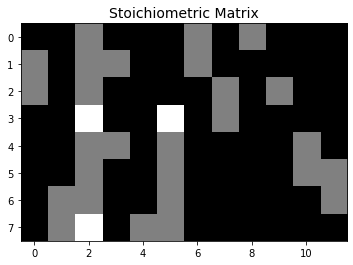

In [32]:
'''4.1) Code for stoichiometric matrix'''
import io

finput = open('data/methane-catalyst-rxn.txt','rt')

reactions = list()

for line in finput:
    stripped_line = line.strip()
    if stripped_line[0] == '#': continue
    if stripped_line[:2] == '..': continue
        
    reactions.append( stripped_line.split(':')[0] )
    
finput.close()
    
for r in reactions: 
    i = reactions.index(r)




for r in reactions: 
    i = reactions.index(r)
    
species_tmp = list()  

for r in reactions:
    
    left  = r.split('<=>')[0].strip()
    right = r.split('<=>')[1].strip()
    
    left_terms  = left.split('+')
    right_terms = right.split('+')
    
    terms = [ t.strip() for t in left_terms ] + [ t.strip() for t in right_terms ] 
    
    for i in terms:
        
        tmp = i.split(' ') 
        
        assert len(tmp)==1 or len(tmp)==2,' terms = %r, i = %r, tmp = %r '%(terms,i,tmp)
        
        if len(tmp) == 2:
            species_tmp.append( tmp[1].strip() ) 
        else:
            species_tmp.append( i.strip() )

species_filtered = set(species_tmp) 

species = list( species_filtered )  


import numpy as np


s_mtrx = np.zeros( (len(reactions),len(species)) )

for r in reactions:
    
    i_row = reactions.index(r)  
    
    left  = r.split('<=>')[0].strip()
    right = r.split('<=>')[1].strip()
    left_terms = left.split('+')
    left_terms = [t.strip() for t in left_terms] 
    right_terms = right.split('+')
    right_terms = [t.strip() for t in right_terms] 
    
    for t in left_terms: 
        
        tmp = t.split(' ') 
        
        if len(tmp) == 2: 
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member)
            
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            
            s_mtrx[i_row,j_col] = -1.0 * coeff
        else: 
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            
            s_mtrx[i_row,j_col] = -1.0

    for t in right_terms: 
        
        tmp = t.split(' ')
        
        if len(tmp) == 2:
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member)
            
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            
            s_mtrx[i_row,j_col] = 1.0 * coeff
        else:
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = 1.0
print('s_mtrx =\n',s_mtrx)

from chen_3170.help import print_reactions

print_reactions( reactions )


from chen_3170.help import plot_matrix
plot_matrix(s_mtrx, title='Stoichiometric Matrix')


In [17]:
'''4.1) Code for computing rank(S)'''
s_mtrx_rank = np.linalg.matrix_rank(s_mtrx)
print('Rank(S) =',s_mtrx_rank)

Rank(S) = 8


**Explanation:**
Above I am pulling a data sheet with the reactions on it and printing it below. I am then stripping and splitting the species so if the species is on the left side it's negative and if its on the right it postive it then counts for how many coeff are on each side. The matrix of these values is names s_mtrx. The next small set of code is to find the rank of the s_mtrx.

### <span style="color:blue">[4.2)](#toa) Build the matrix $\Smtrx\Smtrx^\top$. Build a random production rate density vector, $\gvec$, with values varying from -2.1 to 1.7 [mol/(s cc)]. Compute the solution of the problem:
</span>
<br>
<span style="color:blue">
\begin{equation*}
    \Smtrx\Smtrx^\top\,\rvec = \Smtrx\,\gvec ,
\end{equation*}
</span>    

### <span style="color:blue">and show which reactions are effectively going forward and which reactions are effectively goind backward. Is the solution unique despite the fact that $\gvec$ is a random vector? Explain.</span><a id="a42"></a>

In [18]:
'''Code for random g vector with values between -2.1 to 1.7'''
g_vec = np.array([[-1.1], [-1.4], [1.7],[1.3],[-2.1],[1.1],[-1.8],[-2.0]])
S_ST = s_mtrx @ s_mtrx.transpose()
print('SST =', S_ST)

SST = [[ 7. -2. -6. -2.  2.  3.  2.  3.]
 [-2.  4.  2.  0. -1. -2. -2. -1.]
 [-6.  2.  9.  2. -4. -4. -1. -4.]
 [-2.  0.  2.  3. -1. -1. -1. -1.]
 [ 2. -1. -4. -1.  4.  2.  1.  1.]
 [ 3. -2. -4. -1.  2.  4.  1.  1.]
 [ 2. -2. -1. -1.  1.  1.  4.  1.]
 [ 3. -1. -4. -1.  1.  1.  1.  4.]]


In [21]:
'''Code to solve for r vector'''
ST = s_mtrx.transpose()
import numpy as np


def s_factorization(ST, pivot_option=None ):
   
                  
    m = ST.shape[0]
    n = ST.shape[1]
    
    Lq = np.eye(m,m)    
    Uq = np.copy(ST)
    Pq = np.eye(m)
    Q = np.eye(n)
    
    
    for k in range(min(m,n)):
        max_mag = np.max(np.abs(Uq[k:,k:]))
        pivot_cand = np.abs(np.copy(Uq))
        pivot_cand[:k,:] = 0
        pivot_cand[:,:k] = 0
        (row_ids,col_ids) = np.where(pivot_cand == max_mag)
        pivot_row_id = max(k,row_ids[0])
        pivot_col_id = max(k,col_ids[0])
        pivot = Uq[pivot_row_id,pivot_col_id]
        
        P_k = np.eye(m)
        save = np.copy(P_k[k,:])
        P_k[k,:] = P_k[pivot_row_id, :]
        P_k[pivot_row_id, :] = save
        Pq = P_k @ Pq
        Uq = P_k @ Uq
        
        q_k = np.eye(n)
        save = np.copy(q_k[:,k])
        q_k[:,k] = q_k[:,pivot_col_id]
        q_k[:, pivot_col_id] = save
        
        Q = Q @ q_k
        Uq = Uq @ q_k
        
        for i in range (k+1,m):
            multiplier = Uq[i,k]/pivot
            Lq[i,k] = multiplier
            for j in range (k,n):
                Uq[i,j] -= Uq[k,j] * multiplier
        Lq[:,:k] = P_k @ Lq[:,:k]
    
    return (Pq,Q,Lq,Uq)


In [22]:
(Pq,Q,Lq,Uq) = s_factorization(ST)
print('P =\n',Pq)
print('Q =\n',Q)
print('L =\n',Lq)
print('U =\n',Uq)
print('')
print('Checking...')
print('Max Abs', np.max(np.abs(Lq @ Uq - Pq @ ST @ Q)))

P =
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Q =
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]
L =
 [[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.5         1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.

In [33]:
'''Code for forward and backward reaction rates'''
def fsolve(Lq, g_vec, loop_option='use-dot-product'):

    m = Lq.shape[0]
    n = Lq.shape[1]
    y_vec = np.zeros(m)
    
    for i in range(m):
        sum_lower = np.dot(Lq[i, :i], y_vec[:i])
        y_vec[i] = (g_vec[i] - sum_lower) / Lq[i, i]
    return y_vec


def bsolve(Uq, g_vec, loop_option='use-dot-product'):

    m = Uq.shape[0]
    n = Uq.shape[1]
    z_vec = np.zeros(n)
    
    for i in reversed(range(n)):
        sum_upper = np.dot(Uq[i, i+1:], z_vec[i+1:])
        z_vec[i] = (g_vec[i] - sum_upper) / Uq[i, i]
    return z_vec

def rsolve(ST, g_vec):
    (Pq,Q,Lq,Uq,) = s_factorization(ST)
    y_vec = fsolve(Lq, Pq @ g_vec)
    z_vec = bsolve(Uq, y_vec)
    r_vec = (Q @ r_vec)
    return r_vec

r_vec = rsolve(ST, g_vec)
print('x =',r_vec)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 12)

**Explanation:**
I solved this almost exactly the same as solving the Ax = b problems in stead A = s_mtrx.tranpose() and x = r and b = g. I tried to solve for r. My factorization came out correct, but I had the same problem with my backward solve because the rows is smaller than the columns like in 3.2 and I didn't figure that one out. If I figured out how to change the range correctly on my backward solve I think I would find the answer.


## <span style="color:blue">[Assignment 5 (5 pts)](#toa)</span><a id="a5"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>
I had a alot of trouble trying to create an if statement for rank I didn't end up including it because it was wrong. I also had trouble when it came to the matrices that weren't square. There is something I needed to change when it came to the upper matrix but I don't know what it was. Those were my main struggles I feel I did alright on Assignents 1 and 2 but when it came to 3 and 4 and I didn't do so well. I also am aware I turned this in late I was told from a classmate a late submission on the first day was only 5 points off which I was willing to lose to try to get more done correctly but when I checked today it said 20 points off and if I saw that I would've just turned it in last night. I hope you can decrease the late penalty for me this one time, and if not I understand. I promise I won't turn in another assignment late. Thank you.